In [1]:
%matplotlib notebook

In [2]:
# import dependancies 
import pandas as pd
import re
import tweepy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm
from joblib import dump, load
#load the best model which is the SVM model
predictor = load('../model/svm.joblib') 

In [3]:
# Load in the dataframe
cta_df = pd.read_csv('../Resources/ctatweets_10-30-19_to_11-08-19.csv.csv',  encoding = 'ISO-8859-1')
cta_df.head()

,tweet,user,location,date
0,@x_ajdin773_x @yeahMFyeah @cta Because thereâ...,cta_oh,NaN,2019-11-08 15:30:41
1,@cta is the blue line at OâHare up and runni...,legordonblue15,NaN,2019-11-08 15:30:14
2,@cta @egoldberg10 SEEMS?!?!,cta_oh,NaN,2019-11-08 15:29:20
3,@thuggins @cta EARLY COMPLETION OF PLANNED WOR...,x_ajdin773_x,"Chicago, IL",2019-11-08 15:28:37
4,@yeahMFyeah @cta Lmao!!!! Why did you just sta...,x_ajdin773_x,"Chicago, IL",2019-11-08 15:27:09


In [4]:
#get the tweets column
tweets = cta_df.iloc[:, 0].values
tweets

array(['@x_ajdin773_x @yeahMFyeah @cta Because thereâ\x80\x99s the risk of the daily â\x80\x9cdoor problem at Jarvisâ\x80\x9d issue, leaving the doâ\x80¦ https://t.co/ysDVPo4s9a',
       '@cta is the blue line at Oâ\x80\x99Hare up and running again? Or are there shuttles still taking passengers to Rosemont stop? #thanks',
       '@cta @egoldberg10 SEEMS?!?!', ...,
       'RT @BlainPlanes: @cta @VentraChicago Paris First Class International Blue Line Train to Downtown and Forest Park.',
       "RT @cta: @BlainPlanes @VentraChicago Little did you know, we're an international sensation!",
       '@cta wrong eyesð\x9f\x91\x84'], dtype=object)

In [5]:
# make sure all tweets are in lowercase and remove hashtags, mentions, and links.
clean_data = []                 
for tweet in tweets:
        item = ' '.join(word.lower() for word in tweet.split() \
            if not word.startswith('#') and \
            not word.startswith('@') and \
            not word.startswith('http') and \
            not word.startswith('RT'))
        
        if item == "" or item == "RT":
                continue
        clean_data.append(item)

In [6]:
# https://www.earthdatascience.org/courses/earth-analytics-python/using-apis-natural-language-processing-twitter/calculate-tweet-word-frequencies-in-python/
# used code from link above to remove all special characters 
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

cleaned_data_no_urls = [remove_url(tweet) for tweet in clean_data]
cleaned_data_no_urls[:10]

['because theres the risk of the daily door problem at jarvis issue leaving the do',
 'is the blue line at ohare up and running again or are there shuttles still taking passengers to rosemont stop',
 'seems',
 'early completion of planned work which means bus drivers didnt know it finished early',
 'lmao why did you just stand there you couldve took the red line if one purple line didnt sh',
 'its nice to know that 2 of my favorite tribune writers are nice people too',
 'i cannot with you',
 'on the red line',
 'boy if you dont connect yo ass to a vpn',
 'major delays 95thbound red line trains are running with delays from congestion after earlier police activity at jarvis crews w']

## Predictor
* Load the SVM model and use it to predict the tweet sentiment 
* visualize the data

In [7]:
#predict sentiment
predictions = predictor.predict(cleaned_data_no_urls)

In [13]:
#combine tweets with predictions
results_tuple = list(zip(cleaned_data_no_urls, predictions))
#turn into dataframe
results_df =pd.DataFrame(results_tuple, columns = ['Tweets', 'Sentiment']) 
results_df.head()

,Tweets,Sentiment
0,because theres the risk of the daily door prob...,0
1,is the blue line at ohare up and running again...,0
2,seems,0
3,early completion of planned work which means b...,0
4,lmao why did you just stand there you couldve ...,0


In [14]:
#replace numbers is labels
labels = {1:'Neutral',2:'Positive',0:'Negative'}
results_df["Sentiment"] = results_df["Sentiment"].replace(labels)
pd.set_option('display.max_colwidth', -1)
results_df.head(20)

,Tweets,Sentiment
0,because theres the risk of the daily door problem at jarvis issue leaving the do,Negative
1,is the blue line at ohare up and running again or are there shuttles still taking passengers to rosemont stop,Negative
2,seems,Negative
3,early completion of planned work which means bus drivers didnt know it finished early,Negative
4,lmao why did you just stand there you couldve took the red line if one purple line didnt sh,Negative
5,its nice to know that 2 of my favorite tribune writers are nice people too,Positive
6,i cannot with you,Negative
7,on the red line,Neutral
8,boy if you dont connect yo ass to a vpn,Negative
9,major delays 95thbound red line trains are running with delays from congestion after earlier police activity at jarvis crews w,Negative


In [15]:
#get total count by sentiment
total_types = results_df.groupby("Sentiment").count()
total_types
#reindex
total_types_reindex = total_types.reset_index()
total_types_reindex

,Sentiment,Tweets
0,Negative,2431
1,Neutral,422
2,Positive,154


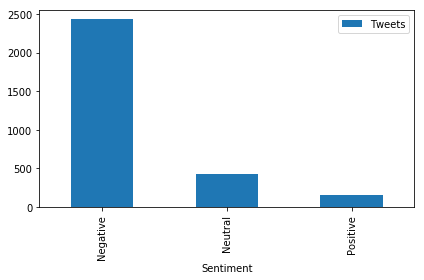

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
#plot sentiment
total_types_reindex.plot(kind='bar',x='Sentiment',y='Tweets')
#save image
plt.tight_layout()
plt.savefig('../Images/Total_Tweets.png')

In [17]:
# Labels for the sections of our pie chart
labels = ["Positive", "Negative", "Neutral"]

# The values of each section of the pie chart
sizes = [98, 1761, 339]

# The colors of each section of the pie chart
colors = ["yellowgreen", "red", "yellow"]

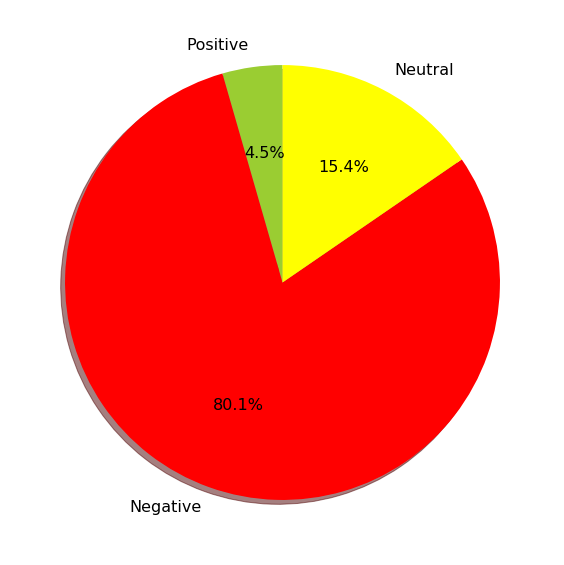

In [18]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, 
         autopct="%1.1f%%", shadow=True, labels=labels, colors=colors, startangle=90, textprops={'fontsize': 16})
fig = plt.gcf()
fig.set_size_inches(10,10) 

plt.savefig("../Images/Pie.png")

## Visualize Tweets by Date

In [19]:
cta_df['date'] = pd.to_datetime(cta_df['date']).dt.to_period('d')
cta_df.head()

,tweet,user,location,date
0,"@x_ajdin773_x @yeahMFyeah @cta Because thereâs the risk of the daily âdoor problem at Jarvisâ issue, leaving the doâ¦ https://t.co/ysDVPo4s9a",cta_oh,NaN,2019-11-08
1,@cta is the blue line at OâHare up and running again? Or are there shuttles still taking passengers to Rosemont stop? #thanks,legordonblue15,NaN,2019-11-08
2,@cta @egoldberg10 SEEMS?!?!,cta_oh,NaN,2019-11-08
3,@thuggins @cta EARLY COMPLETION OF PLANNED WORK which means bus drivers didnât know it finished early,x_ajdin773_x,"Chicago, IL",2019-11-08
4,@yeahMFyeah @cta Lmao!!!! Why did you just stand there ð¤£you couldâve took the red line if one purple line didnât shâ¦ https://t.co/cesznowGZa,x_ajdin773_x,"Chicago, IL",2019-11-08


In [20]:
grouped_cta_df = cta_df.groupby(['date']).count()

grouped_cta_df.head(20)

,tweet,user,location
date,,,
2019-10-30,253,253,159
2019-10-31,915,915,672
2019-11-01,474,474,344
2019-11-02,146,146,98
2019-11-03,110,110,76
2019-11-04,170,170,126
2019-11-05,147,147,106
2019-11-06,209,209,146
2019-11-07,413,413,310


In [21]:
# Filter the DataFrame down only to those columns to chart
date_and_tweet = grouped_cta_df[["tweet"]]

# # Set the index to be "date" so they will be used as labels
# date_and_tweet = date_and_tweet.set_index("date")

date_and_tweet.head()

,tweet
date,
2019-10-30,253
2019-10-31,915
2019-11-01,474
2019-11-02,146
2019-11-03,110


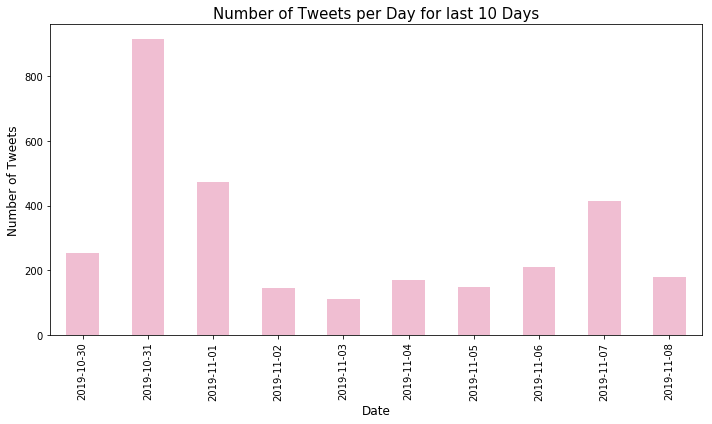

In [95]:
# Use DataFrame.plot() in order to create a bar chart of the data
date_and_tweet.plot(kind="bar", color='#e27ea6', figsize=(10,6), alpha=0.5, align="center")

# Set a title for the chart
plt.title("Number of Tweets per Day for last 10 Days", fontsize = 15)
plt.xlabel("Date", fontsize = 12 )
plt.ylabel("Number of Tweets", fontsize = 12)
plt.legend().set_visible(False)
plt.tight_layout()



# ax.yaxis.label.set_size(12)
# plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=10)
# plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=12)
plt.savefig("../Images/Tweets vs Date.png")
plt.show()

## Visaulize the Most Common Words

In [35]:
import matplotlib.pyplot as plt
import collections
from PIL import Image
from wordcloud import STOPWORDS, ImageColorGenerator

In [44]:
# sum the number of words in all tweets, place in a variable 
text = " ".join(tweet for tweet in cleaned_data_no_urls)
print ("There are {} words total in all captured tweets.".format(len(text)))

# create a list of all words
text_list = text.split()
print(text_list[0:5])

There are 254085 words total in all captured tweets.
['because', 'theres', 'the', 'risk', 'of']


In [55]:
stopwords = set(STOPWORDS)
stopwords.update(["cta", "line", "http", "https", "co", "significant", "train", "residual", 
                  "RT", "following", "running", "chicago", "now","trains", "blue", "red","brown", 
                  "purple","orange", "pink", "green", "yellow", "near", "forest", "rails", "park", 
                  "bound", "citizens", "amp"])


In [56]:
# Remove stop words from each tweet list of words
tweets_no_stop_words = [word for word in text_list if not word in stopwords]

In [58]:
# count the 15 most common words
counts_tweets = collections.Counter(tweets_no_stop_words)
counts_tweets.most_common(15)

[('delays', 911),
 ('due', 338),
 ('service', 328),
 ('standing', 278),
 ('working', 252),
 ('earlier', 248),
 ('crews', 240),
 ('wresidual', 213),
 ('major', 161),
 ('restore', 157),
 ('minor', 147),
 ('police', 135),
 ('tracks', 133),
 ('people', 131),
 ('activity', 125)]

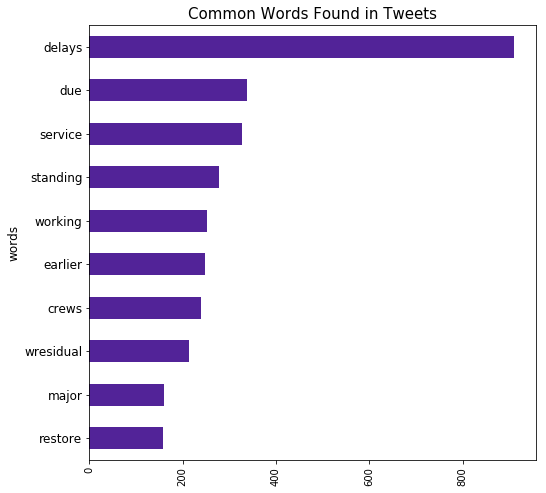

In [94]:
# create DataFrame of the most common words
tweets_common_words = pd.DataFrame(counts_tweets.most_common(10),
                             columns=['words', 'count'])


# Plot horizontal bar graph
fig, ax = plt.subplots(figsize=(8, 8))
tweets_common_words.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="#522398")
ax.set_title("Common Words Found in Tweets", fontsize=15)
ax.yaxis.label.set_size(12)
plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=10)
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=12)
plt.legend().set_visible(False)


# show and save the barchart
plt.savefig("../Images/Common_Words.png")
plt.show()